In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup/WorldCupPlayers.csv
/kaggle/input/fifa-world-cup/WorldCupMatches.csv
/kaggle/input/fifa-world-cup/WorldCups.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
world_cups = pd.read_csv('../input/fifa-world-cup/WorldCups.csv')
world_cup_player = pd.read_csv('../input/fifa-world-cup/WorldCupPlayers.csv')
world_cups_matches = pd.read_csv('../input/fifa-world-cup/WorldCupMatches.csv')

In [4]:
world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [5]:
world_cup_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [6]:
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
world_cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [8]:
world_cups.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


**Plotting the Number of Matches Played at Each World Cup**

In [9]:
matches_played=world_cups.groupby(['Year','Country'])['MatchesPlayed'].sum()
matches_played.reset_index()

,Year,Country,MatchesPlayed
0,1930,Uruguay,18
1,1934,Italy,17
2,1938,France,18
3,1950,Brazil,22
4,1954,Switzerland,26
5,1958,Sweden,35
6,1962,Chile,32
7,1966,England,32
8,1970,Mexico,32
9,1974,Germany,38


Text(0.5, 1.0, 'Matches Played at Each Tournament')

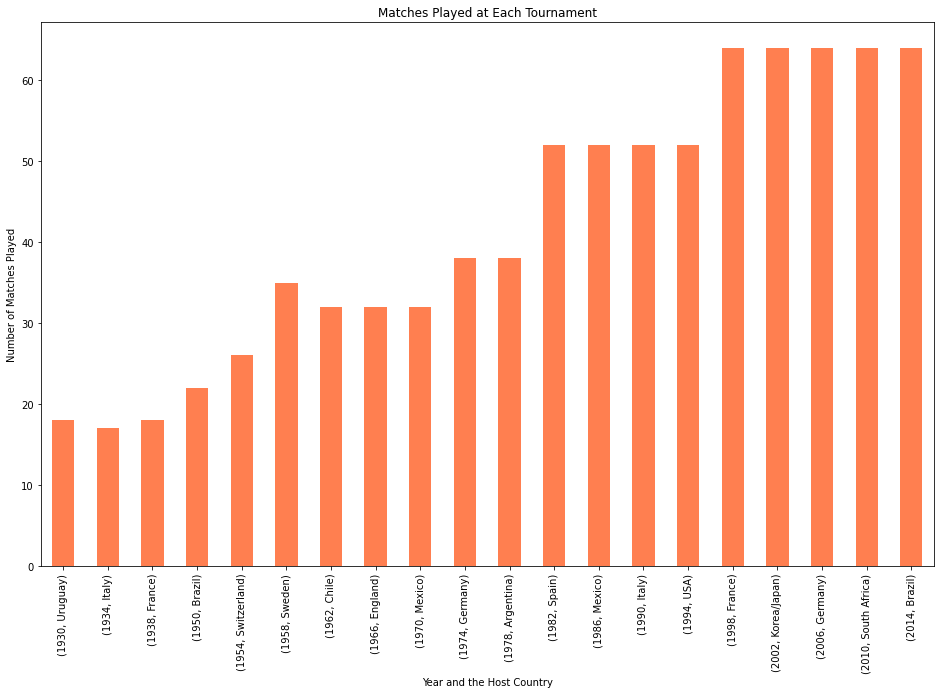

In [10]:
f, ax = plt.subplots(figsize=(16,10))
matches_played=world_cups.groupby(['Year','Country'])['MatchesPlayed'].sum()
matches_played.plot(kind='bar',color='coral')
plt.xlabel('Year and the Host Country')
plt.ylabel('Number of Matches Played')
plt.title('Matches Played at Each Tournament')

In [11]:
winner=world_cups.groupby('Winner').size()
winner.sort_values(ascending=False)
df=pd.DataFrame({'Winner':['Brazil','Italy','Germany FR','Argentina','Uruguay','England','France','Germany','Spain'],
                'Number of times Won':[5,4,3,2,2,1,1,1,1]})
df

,Winner,Number of times Won
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Germany,1
8,Spain,1


**Plotting the Number of Times a Team has Won a World Cup**

Text(0.5, 1.0, 'Most Successfull Teams at the World Cup')

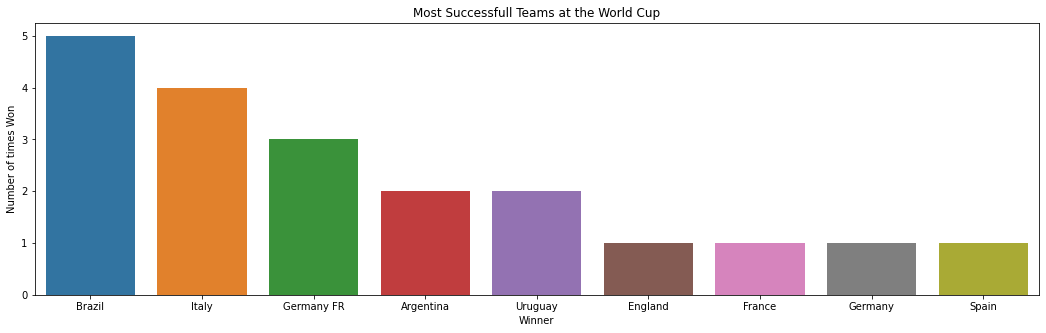

In [12]:
f, ax = plt.subplots(figsize=(18,5))
sns.barplot(x="Winner",y="Number of times Won",data=df)
plt.title("Most Successfull Teams at the World Cup")

<AxesSubplot:xlabel='Winner', ylabel='count'>

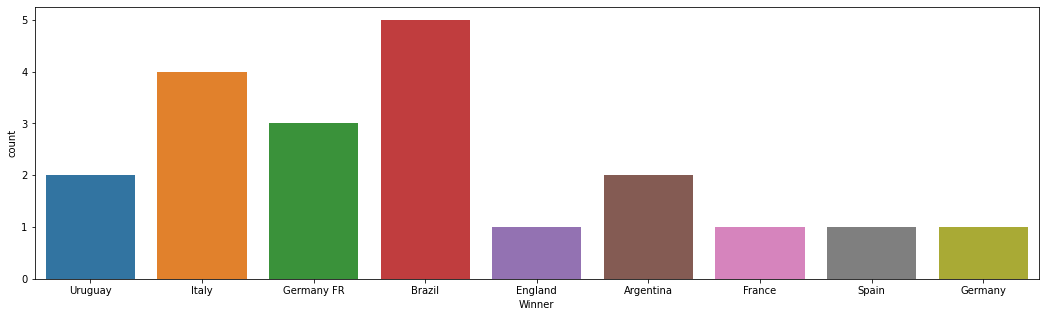

In [13]:
f, ax = plt.subplots(figsize=(18,5))
sns.countplot(x=world_cups['Winner'])

In [14]:
winner=world_cups['Winner'].value_counts()
runner_up=world_cups['Runners-Up'].value_counts()
third=world_cups['Third'].value_counts()
teams=pd.concat([winner,runner_up,third],axis=1)
teams=teams.fillna(0)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Uruguay,2.0,0.0,0.0
Argentina,2.0,3.0,0.0
France,1.0,1.0,2.0
England,1.0,0.0,0.0
Spain,1.0,0.0,0.0
Germany,1.0,1.0,3.0
Netherlands,0.0,3.0,1.0


****Number of Times a Team has Finised as Winners, Runners-Up or at the Third Place****

<AxesSubplot:>

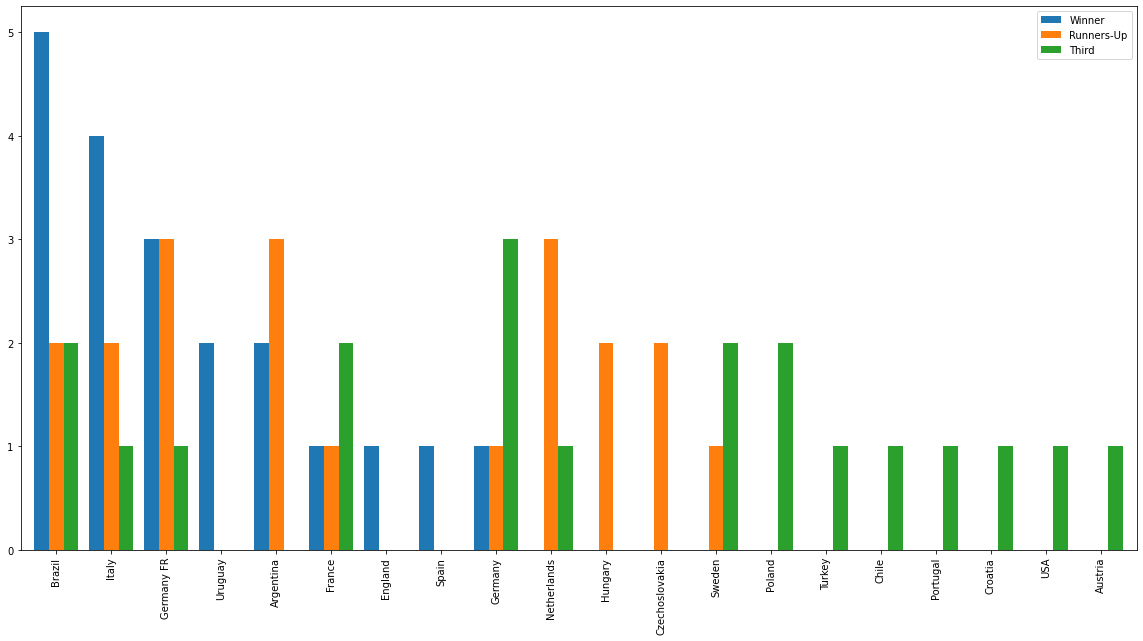

In [15]:
teams.plot(kind='bar',figsize=(20,10),width=0.8)

In [16]:
df=world_cups_matches.copy()
df.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [17]:
df=df.dropna(axis=0)

In [18]:
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


**Stadiums that have Hosted Most World Cup Games**

Text(0.5, 1.0, 'Top 10 Stadiums that have Hosted most Games at the World Cup')

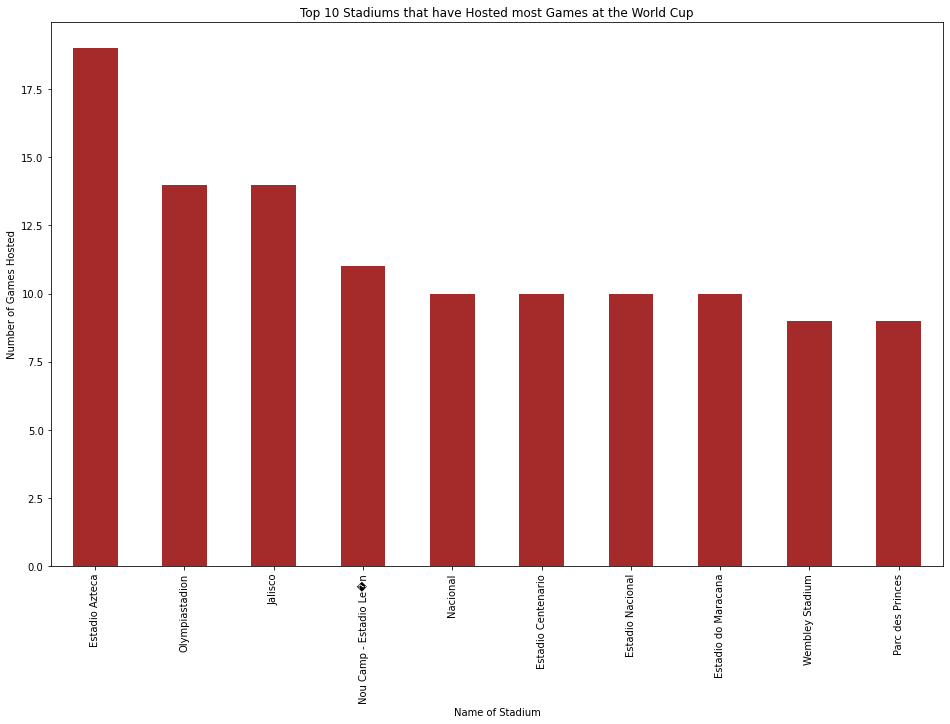

In [19]:
f, ax = plt.subplots(figsize=(16,10))
stadium=df['Stadium'].value_counts()[:10]
stadium.plot(kind='bar',color='brown')
plt.xlabel('Name of Stadium')
plt.ylabel('Number of Games Hosted')
plt.title('Top 10 Stadiums that have Hosted most Games at the World Cup')

**Total Attendance at Each World Cup**

Text(0.5, 1.0, 'Total Attendance at Each World Cup')

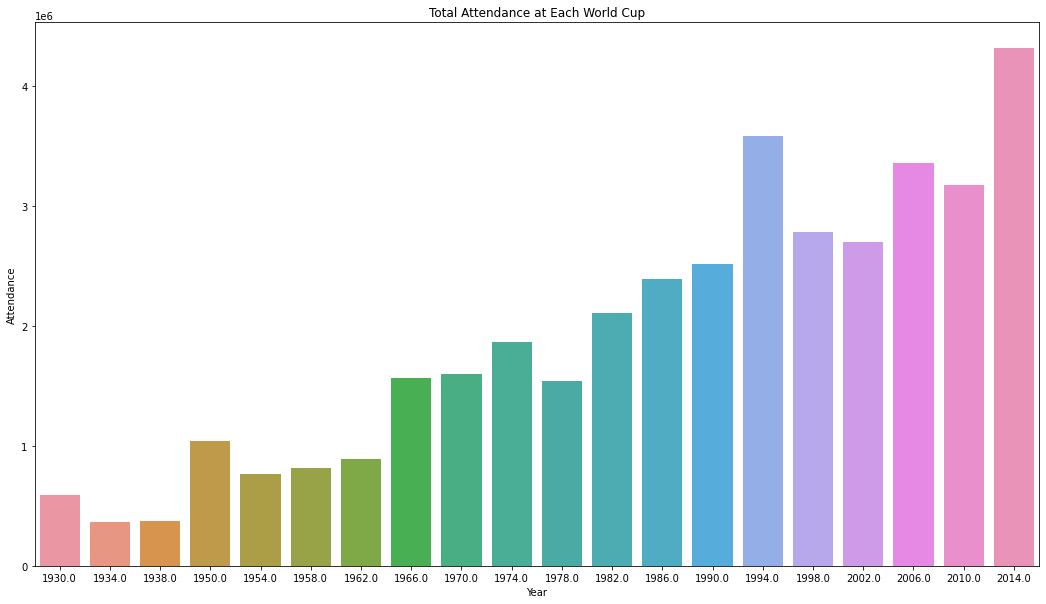

In [20]:
matches_attendance=world_cups_matches.groupby(["Year"])["Attendance"].sum().reset_index()
matches_attendance
plt.figure(figsize=(18,10))
sns.barplot(data=matches_attendance,x="Year",y="Attendance")
plt.title("Total Attendance at Each World Cup")

In [21]:
matches_attendance

,Year,Attendance
0,1930.0,590549.0
1,1934.0,363000.0
2,1938.0,375700.0
3,1950.0,1045246.0
4,1954.0,768607.0
5,1958.0,819810.0
6,1962.0,893172.0
7,1966.0,1563135.0
8,1970.0,1603975.0
9,1974.0,1865753.0


**Cities that have Hosted Most World Cup Games**

Text(0.5, 1.0, 'Cities that have Hosted Most Games at the World Cup')

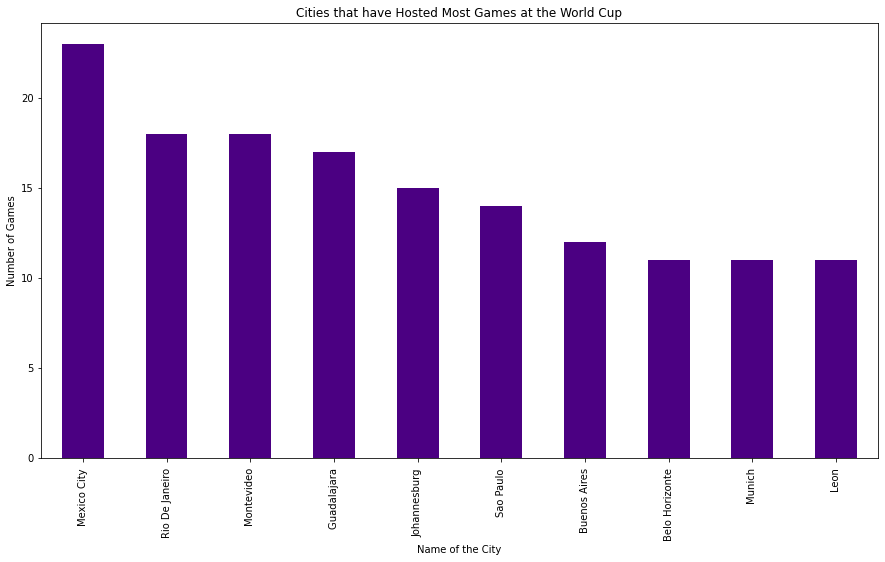

In [22]:
df1=df['City'].value_counts().loc[lambda x:x>10]
df1.plot(kind='bar',figsize=(15,8),color='indigo')
plt.xlabel('Name of the City')
plt.ylabel('Number of Games')
plt.title('Cities that have Hosted Most Games at the World Cup')

**Matches that had the Highest Attendance**

Text(0.5, 1.0, 'Matches With Highest Attendance')

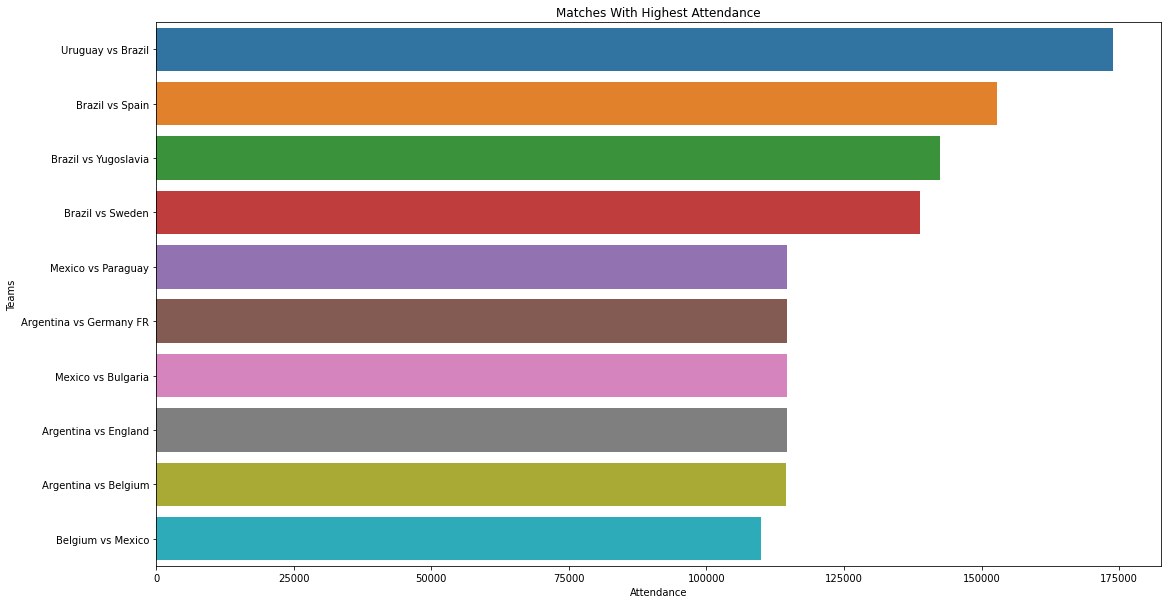

In [23]:
plt.figure(figsize=(18,10))
teams=df.sort_values(by="Attendance",ascending=False)[:10]
teams["Teams"]=teams["Home Team Name"]+ " vs "+ teams["Away Team Name"]
sns.barplot(y="Teams",x="Attendance",data=teams)
plt.title("Matches With Highest Attendance")

In [24]:
world_cup_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [25]:
world_cup_player.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

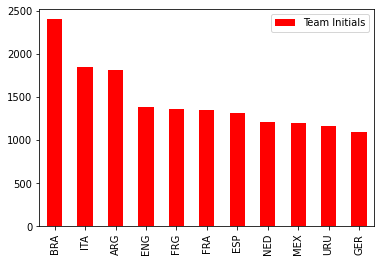

In [26]:
plt.figure(figsize=(20,10))
x=world_cup_player['Team Initials'].value_counts().loc[lambda x:x>1000].to_frame()
x.plot(kind="bar",color="red")

In [27]:
world_cup_player['Player Name'].value_counts()

RONALDO               33
KLOSE                 32
M�LLER                28
OSCAR                 28
JULIO CESAR           26
                      ..
Frans VAN DER VEEN     1
Robert LAMOOT          1
Hendrikus PLENTER      1
OCTACILIO              1
Vincente PEREZ         1
Name: Player Name, Length: 7663, dtype: int64

**Players Who Were Involved At The Most World Cup Matches**

Text(0.5, 1.0, 'Players who have played the most at the World Cup')

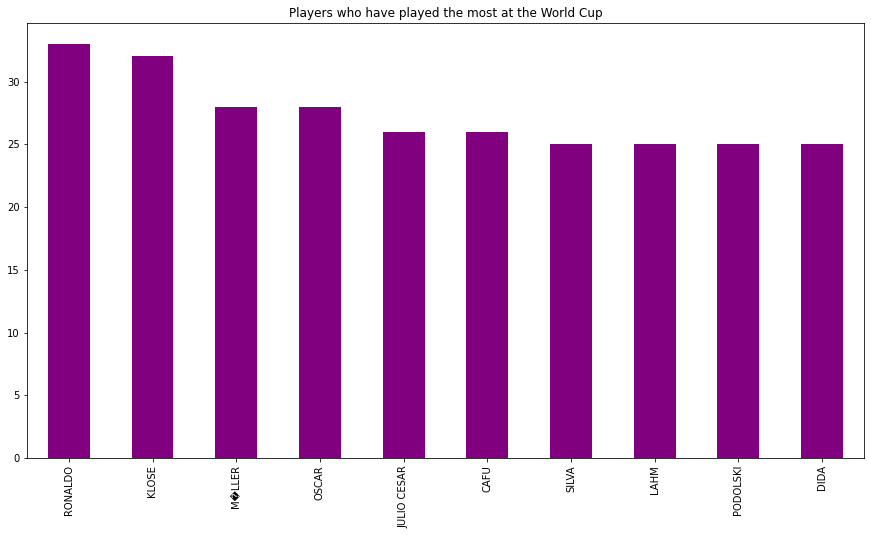

In [28]:
plt.figure(figsize=(15,8))
df1=world_cup_player['Player Name'].value_counts()[:10]
df1.plot(kind="bar",color='purple')
plt.title('Players who have played the most at the World Cup')

NOTE: Ronaldo has been Removed as there are 2 Ronaldo's( 1 of Brazil and 1 of Portugal) 

Text(0.5, 1.0, 'Players who have played the most at the World Cup')

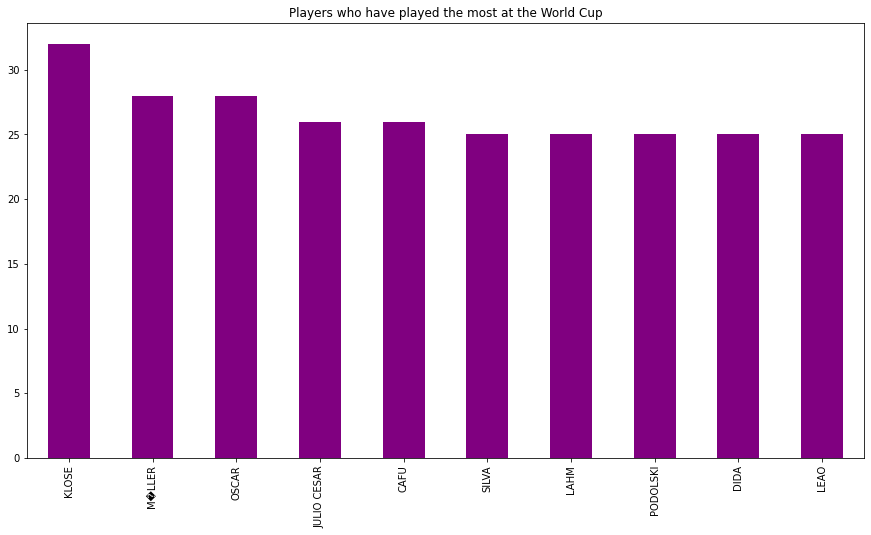

In [29]:
plt.figure(figsize=(15,8))
df1=world_cup_player['Player Name'].value_counts()[1:11]
df1.plot(kind="bar",color='purple')
plt.title('Players who have played the most at the World Cup')

In [30]:
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
world_cups_matches=world_cups_matches.dropna(axis=0)

In [32]:
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [33]:
def outcomes(world_cups_matches):
    if(world_cups_matches['Home Team Goals']>world_cups_matches['Away Team Goals']):
        return 'Home Team Won'
    if(world_cups_matches['Home Team Goals']<world_cups_matches['Away Team Goals']):
        return 'Away Team Won'
    else:
        return 'Match was Drawn'

In [34]:
world_cups_matches['Result']=world_cups_matches.apply(lambda x:outcomes(x),axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Result
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Won
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Won
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Won
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Won
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,Match was Drawn
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,Away Team Won
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,Match was Drawn
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,...,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,Away Team Won


In [36]:
data=world_cups_matches['Result'].value_counts()
data

Home Team Won      486
Match was Drawn    190
Away Team Won      174
Name: Result, dtype: int64

**Pie Chart to Show The Percentage of Matches Won by Home or Away Team**

Text(0.5, 1.0, 'Percentage of Games Won by Teams')

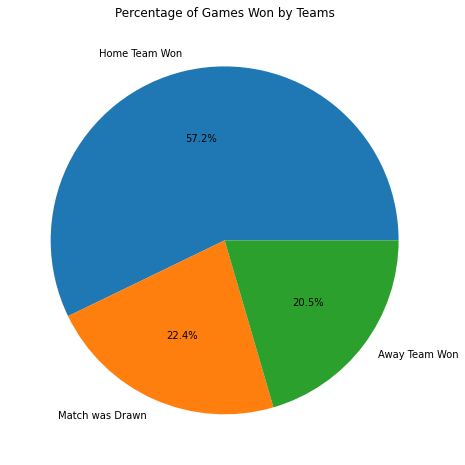

In [37]:
pie, ax = plt.subplots(figsize=[12,8])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%",labels=labels)
plt.title("Percentage of Games Won by Teams")

In [38]:
world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


**Teams That Were Hosts and Were the Winners of the World Cup**

In [39]:
host=world_cups[world_cups['Country']==world_cups['Winner']]
host

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100


<AxesSubplot:xlabel='Winner', ylabel='count'>

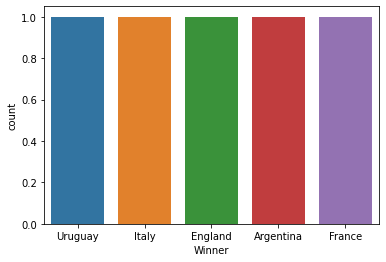

In [40]:
sns.countplot(x='Winner',data=host)

**Teams that were thee Hosts and Finished as the Runners-Up at the World Cup**

In [41]:
host1=world_cups[world_cups['Country']==world_cups['Runners-Up']]
host1

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810


<AxesSubplot:xlabel='Runners-Up', ylabel='count'>

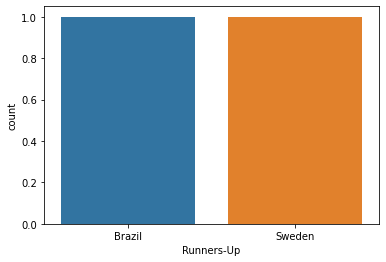

In [42]:
sns.countplot(x='Runners-Up',data=host1)

**Total Number of Goals Scored by Teams at the World Cup**

Text(0.5, 1.0, 'Total Number of Goals Scored by Teams at World Cups')

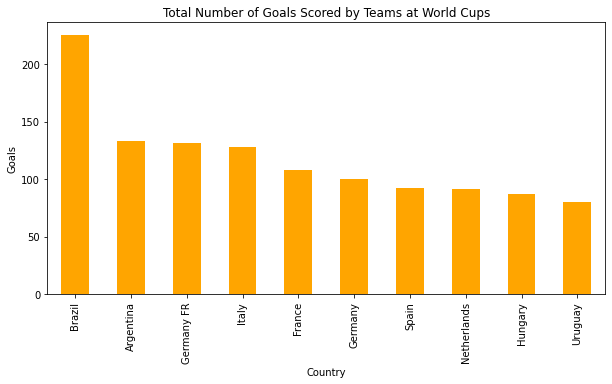

In [46]:
home = world_cups_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = world_cups_matches[['Away Team Name', 'Away Team Goals']].dropna()
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
home.columns=['countries','goals']
away.columns=['countries','goals']

goal_per_country=goal_per_country.append(home)
goal_per_country=goal_per_country.append(away)

total_goals=goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
total_goals.plot(kind='bar',color='orange')
plt.xlabel('Country')
plt.ylabel('Goals')
plt.title('Total Number of Goals Scored by Teams at World Cups')

In [47]:
total_goals

countries
Brazil         225.0
Argentina      133.0
Germany FR     131.0
Italy          128.0
France         108.0
Germany        100.0
Spain           92.0
Netherlands     91.0
Hungary         87.0
Uruguay         80.0
Name: goals, dtype: float64

**Most Goals Scored by a Single Team at a World Cup**

Text(0.5, 1.0, 'Most Goals Scored by a Team at a World Cup')

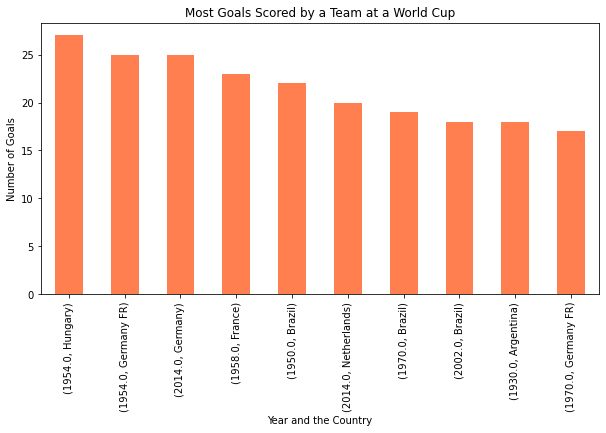

In [49]:
home = world_cups_matches[['Year','Home Team Name', 'Home Team Goals']].dropna()
away = world_cups_matches[['Year','Away Team Name', 'Away Team Goals']].dropna()
goals = pd.DataFrame(columns=['year','countries', 'goals'])
home.columns=['year','countries','goals']
away.columns=['year','countries','goals']

goals=goals.append(home)
goals=goals.append(away)

a=goals.groupby(['year','countries'])['goals'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
a.plot(kind='bar',color='coral')
plt.xlabel('Year and the Country')
plt.ylabel('Number of Goals')
plt.title('Most Goals Scored by a Team at a World Cup')

In [50]:
most_goals=goals.groupby(['year','countries'])['goals'].sum().sort_values(ascending=False)[:10]
most_goals

year    countries  
1954.0  Hungary        27.0
        Germany FR     25.0
2014.0  Germany        25.0
1958.0  France         23.0
1950.0  Brazil         22.0
2014.0  Netherlands    20.0
1970.0  Brazil         19.0
2002.0  Brazil         18.0
1930.0  Argentina      18.0
1970.0  Germany FR     17.0
Name: goals, dtype: float64